In [ ]:
# 本コンペ概要
"""
・タイタニック号の乗客の情報から生存したか否かを予測するモデルを作成する。

・タイタニックは20世紀初頭に建造された豪華客船。航海中に北大西洋上で氷山に接触し、その後に沈没した。
このような悲劇を二度と繰り返さないために乗客の情報から生存買う人を予測するモデルを作成し、今後の海難事故の防止に活かします。

"""
# Evaluation（評価指標）
"""
accuracy（正解率）
・予測結果全体がどれくらい真の値と一致しているかを表す指標

ex（例）
・2つのうち1つ正解していたら正解率は0.5(50%)になります。

"""

以下、参照画像
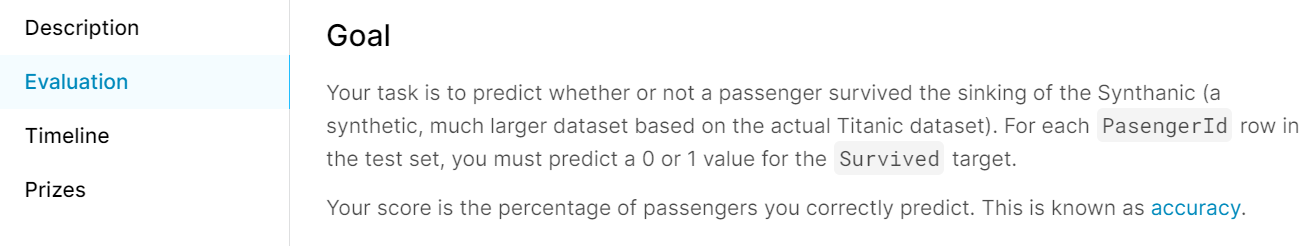

# 1. help （Kaggleのオフライン実行とsubmitの仕方）

### 1.このnotebookの右上のSave VersionをClick<br>

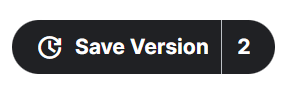

### 2.save & run & commitを実行<br>
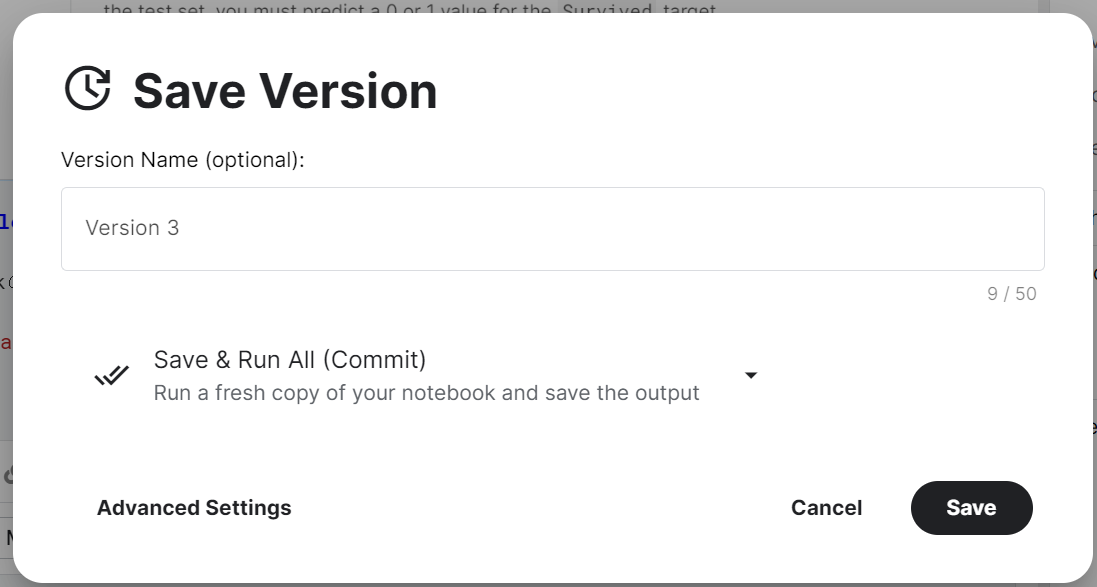

### 3.左下の添付画像Click<br>
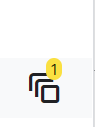

### 4.succusefulをクリック<br>
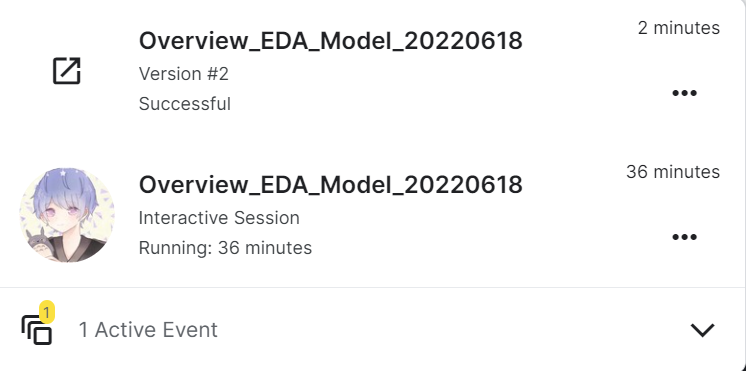

### 5. dataタブを選択し、submitする<br>
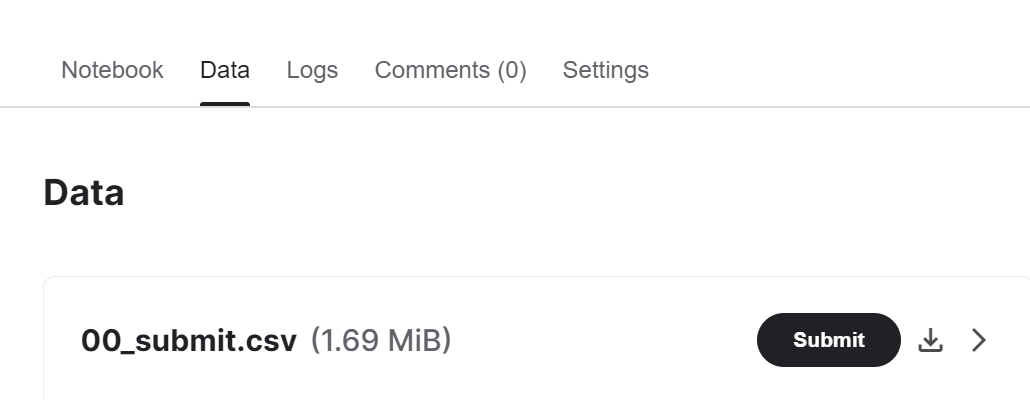

### 6. 自分が提出していnotebook, csvファイルを選択し、submitする<br>
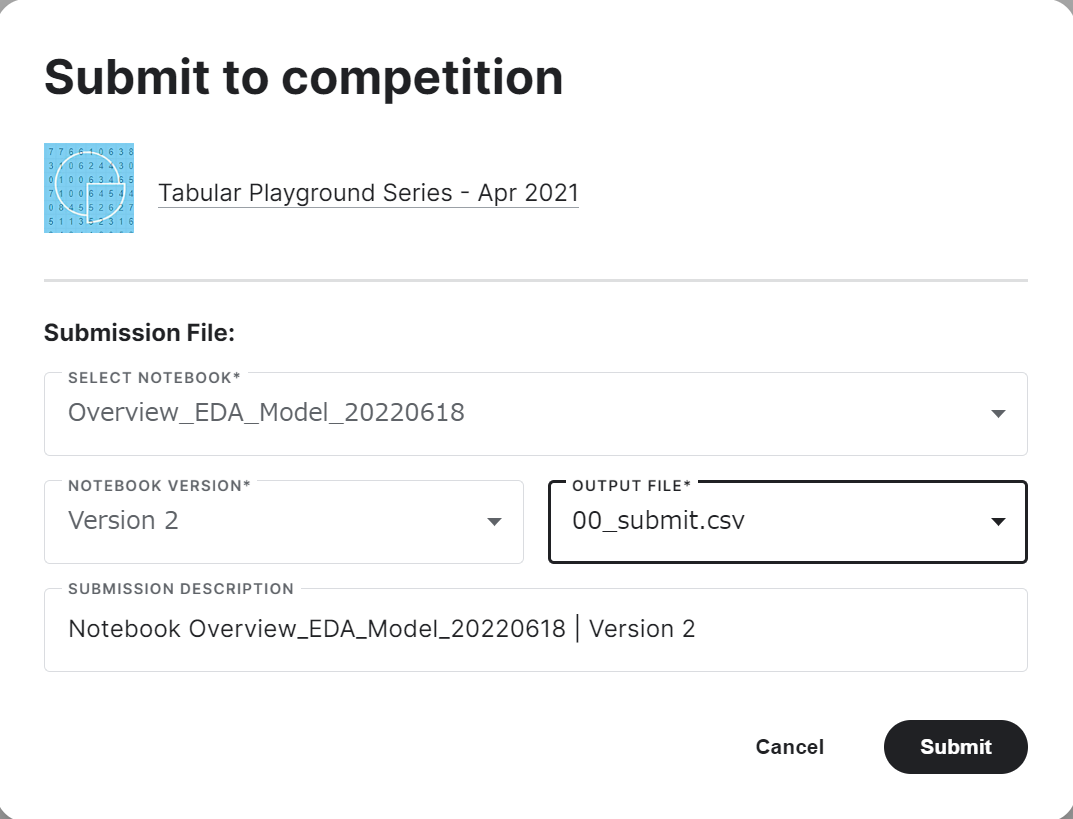

# 2. EDA（探索的データ分析）やってくよ。

In [ ]:
import pandas as pd 

sub = pd.read_csv('../input/tabular-playground-series-apr-2021/sample_submission.csv')
train = pd.read_csv('../input/tabular-playground-series-apr-2021/train.csv')
test = pd.read_csv('../input/tabular-playground-series-apr-2021/test.csv')

In [ ]:
print(len(train))
print(len(test))

In [ ]:
print(f'train:\n{train.isnull().sum()}')
print(f'\ntest:\n{test.isnull().sum()}')

In [ ]:
display(train.head(1))

In [ ]:
# train columns description 
"""
PassengerId：index
Survived：生還結果（1=生還, 0=死亡）：今回予測するターゲット
Pclass：客室のクラス（1,2,3の順に高級のクラス）
Name：名前
Sex：性別
Age：年齢
SibSp：乗船していた兄弟、配偶者の数
Parch：乗船していた両親、子供の数
Ticket：チケットの番号
Fare：運賃
Cabin：客室番号
Embarked：乗船した港


☆Point
train:
全データ10,000件に対して、カラムCabinが約70,000の欠損値データがあります。



"""

### 2-1. 客室クラス

In [ ]:
import seaborn as sns

sns.countplot(x=train['Pclass'],hue="Survived",data=train)

☆カラム説明(再掲)<br>
Survived：生還結果（1=生還, 0=死亡）：今回予測するターゲット<br>
Pclass：客室のクラス（1,2,3の順に高級のクラス）<br>

☆データからの分かること<br>
Pclass3（三等室：一番下位の部屋）についてSurvived=0（死亡）が多くなっている。<br>
→お金持ちが優先して助けられた。

In [ ]:
# 参考（数値）
train['Pclass'].value_counts()

In [ ]:
# 参考（数値）
train['Survived'].value_counts()

### 2-2. 性別

In [ ]:
sns.countplot(x=train['Sex'],hue="Survived",data=train)

☆カラム説明（再掲）<br>
Survived：生還結果（1=生還, 0=死亡）：今回予測するターゲット<br>
Sex：性別<br>

☆データから分かること<br>
女性の生存者が多い。<br>
→女性が優先的に救助された？もしくは男性が三等室に多く存在していた？女性が一等室に多く存在していた？<br>

In [ ]:
sns.countplot(x=train['Sex'],hue="Pclass",data=train)

男性が三等室に多く存在していたことがグラフから見て取れるね。<br>
また、一等室（一番高級な部屋）は女性も男性もそこまで差はなさそうに見える。（ただ、女性の方が多いね。）<br>

### 2-3. 年齢

In [ ]:
sns.countplot(x=train['Age'],hue="Survived",data=train)

うーん。よくわからん。<br>
年齢の幅を絞ってデータの可視化を行います。<br>

In [ ]:
train_age_0_15 = train[train['Age']<=15]
train_age_15_Over = train[train['Age']>15]

display(train_age_0_15.head(1))
display(train_age_15_Over.head(1))

In [ ]:
sns.countplot(x='Age',hue="Survived",data=train_age_0_15)

In [ ]:
sns.countplot(x='Age',hue="Survived",data=train_age_15_Over)

よくわからんから年齢幅を区切って作成する。
参考記事：https://qiita.com/seri28/items/ae98aa1965fc29cd864d

In [ ]:
import matplotlib.pyplot as plt
#Ageの欠損値を除いたデータフレーム'age_data'を作成
train_age = train.dropna(subset=['Age']).copy()
#10歳ごとに区分け
train_age['Age_bin'] = pd.cut(train_age['Age'],[i for i in range(0,81,10)])

fig, ax = plt.subplots(1,2, figsize=(20,8))
sns.countplot(x='Age_bin',hue="Survived",data=train_age,ax=ax[0])
sns.countplot(x='Age_bin', hue='Sex', data=train_age, ax=ax[1])

☆カラム説明（再掲）<br>
Survived：生還結果（1=生還, 0=死亡）：今回予測するターゲット<br>

☆上記グラフの説明
左：横軸を年齢幅。縦軸を生還結果（今回のターゲット）<br>
右：横軸を年齢幅。縦軸を性別にしています。<br>

☆to do <br>
このグラフからどんなことが読み取れるでしょうか？<br>

### anser

In [ ]:
# anser 
"""
20歳以下の生還率が高いことが読み取れるね。
では、こちらについてさらに深堀してみよう！

20歳以下の男性について客室クラス別に生還率を確認してみます。
"""

In [ ]:
train_age.head(1)

In [ ]:
train_age['Age_bin'].value_counts()

In [ ]:
!pip install japanize-matplotlib

In [ ]:
# 女性かつ年齢が15歳以下の人において一等室、二等室の人と三等室の人で生還率の違いを確認。
import japanize_matplotlib

train_age_20down = train_age[(train_age['Age'] < 15)& (train_age['Sex'] == 'female') ]
train_age_20down_Pclass_3 = train_age_20down[train_age_20down['Pclass'] == 3]
train_age_20down_Pclass_1_2 = train_age_20down[train_age_20down['Pclass'] != 3]
    

fig, ax = plt.subplots(1,2, figsize=(20,8))
ax[0].set_title("一等室,二等室")
ax[1].set_title("三等室")

sns.countplot(x='Age',hue="Survived",data=train_age_20down_Pclass_1_2,ax=ax[0])
sns.countplot(x='Age',hue="Survived",data=train_age_20down_Pclass_3,ax=ax[1])

このような結果から新しい特徴量を作成することができます。<br>
例えば、<br>
15歳以下女性かつ一等室、二等室の人を1<br>
15歳以下女性かつ三等室の人を2<br>
15歳以上女性かつ一等室、二等室の人を3<br>
15歳以上女性かつ三等室の人を4<br>



15歳以下男性かつ一等室、二等室の人を5<br>
15歳以下男性かつ三等室の人を6<br>
15歳以上男性かつ一等室、二等室の人を7<br>
15歳以上男性かつ三等室の人を8<br>

In [ ]:
# 上記のような考え方で特徴量を増やしていくことで一般的には、高精度のモデルを作成することができます。

In [ ]:
# 特徴量を増やすアイデア
"""
SibSp：乗船していた兄弟、配偶者の数
Parch：乗船していた両親、子供の数
これらのカラムは足し算することで家族の人数になります。
→家族の数が多いほうが生還率は高くなるのでしょうか？


"""

### ということで脳死で特徴量を作ります。

# 3.データの前処理（欠損値の処理や特徴量の作成）

In [ ]:
import pandas as pd 

sub = pd.read_csv('../input/tabular-playground-series-apr-2021/sample_submission.csv')
train = pd.read_csv('../input/tabular-playground-series-apr-2021/train.csv')
test = pd.read_csv('../input/tabular-playground-series-apr-2021/test.csv')

In [ ]:
def make_data(df):
    df= df.replace("male",0).replace("female",1).replace("S",0).replace("C",1).replace("Q",2)

    df["Age"].fillna(df.Age.mean(), inplace=True) 
    df["Embarked"].fillna(df.Embarked.mean(), inplace=True)

    combine1 = [df]

    for df in combine1: 
            df['Salutation'] = df.Name.str.extract(' ([A-Za-z]+).', expand=False) 
    for df in combine1: 
            df['Salutation'] = df['Salutation'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
            df['Salutation'] = df['Salutation'].replace('Mlle', 'Miss')
            df['Salutation'] = df['Salutation'].replace('Ms', 'Miss')
            df['Salutation'] = df['Salutation'].replace('Mme', 'Mrs')
            del df['Name']
    Salutation_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5} 
    for df in combine1: 
            df['Salutation'] = df['Salutation'].map(Salutation_mapping) 
            df['Salutation'] = df['Salutation'].fillna(0)

    import numpy as np
    for df in combine1: 
            df['Ticket_Lett'] = df['Ticket'].apply(lambda x: str(x)[0])
            df['Ticket_Lett'] = df['Ticket_Lett'].apply(lambda x: str(x)) 
            df['Ticket_Lett'] = np.where((df['Ticket_Lett']).isin(['1', '2', '3', 'S', 'P', 'C', 'A']), df['Ticket_Lett'], np.where((df['Ticket_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']), '0','0')) 
            df = df.astype({'Ticket': str})
            df['Ticket_Len'] = df['Ticket'].apply(lambda x: len(x)) 
            del df['Ticket'] 
    df['Ticket_Lett']=df['Ticket_Lett'].replace("1",1).replace("2",2).replace("3",3).replace("0",0).replace("S",3).replace("P",0).replace("C",3).replace("A",3)


    for df in combine1: 
        df['Cabin_Lett'] = df['Cabin'].apply(lambda x: str(x)[0]) 
        df['Cabin_Lett'] = df['Cabin_Lett'].apply(lambda x: str(x)) 
        df['Cabin_Lett'] = np.where((df['Cabin_Lett']).isin([ 'F', 'E', 'D', 'C', 'B', 'A']),df['Cabin_Lett'], np.where((df['Cabin_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']), '0','0'))
    del df['Cabin'] 
    df['Cabin_Lett']=df['Cabin_Lett'].replace("A",1).replace("B",2).replace("C",1).replace("0",0).replace("D",2).replace("E",2).replace("F",1)

    df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
    for df in combine1:
        df['IsAlone'] = 0
        df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1
    return df

In [ ]:
train = make_data(train)
test = make_data(test)
train.head(10)

In [ ]:
train = train[["PassengerId","Survived","Pclass","Sex","Age","SibSp","Parch","Embarked","Salutation","Cabin_Lett","FamilySize","IsAlone"]]
test = test[["PassengerId","Pclass","Sex","Age","SibSp","Parch","Embarked","Salutation","Cabin_Lett","FamilySize","IsAlone"]]
train

In [ ]:
train.isnull().sum()

In [ ]:
train_data = train.values
xs = train_data[:, 2:] # Pclass以降の変数
y  = train_data[:, 1]  # 正解データ

test_data = test.values
xs_test = test_data[:, 1:]

# 4. modelの作成とSubmitファイルの作成

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest=RandomForestClassifier()
random_forest.fit(xs, y)
y_pred = random_forest.predict(xs_test)

In [ ]:
sub['Survived'] = y_pred

In [ ]:
sub['Survived'].value_counts()

In [ ]:
sub = sub.astype({'Survived': int})
sub.to_csv('00_submit.csv',index=None)

# コメント & todo 

本notebookはKaggleの流れを解説したものになります。<br>
こちらnotebookをsubmitしてもかなりScoreが低かったです泣<br>
KaggleのDiscussionやCode, ネット検索を用いて様々な特徴量を作成し、精度の高いモデルを作成してみてください。<br>

〇検索ワードヒント<br>
kaggle タイタニック 特徴量作成<br>
Pycaret タイタニック<br>
テーブルデータ 特徴量作成<br>
テーブルデータ 前処理<br>
